In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import seaborn as sns

In [4]:
logfiles = glob.glob("*_log.pkl")

In [5]:
acc_traces = []
valid_acc_traces = []
for file in logfiles:
    with open(file, "rb") as f:
        traces = pkl.load(f)
    acc_traces.append(traces[0])
    valid_acc_traces.append(traces[1])

acc_traces = np.stack(acc_traces, 0)
valid_acc_traces = np.stack(valid_acc_traces, 0)
logfiles = np.array(logfiles)
bests = np.array([np.max(t) for t in valid_acc_traces])
indices = np.argsort(-bests)
logfiles = logfiles[indices]
acc_traces = acc_traces[indices]
valid_acc_traces = valid_acc_traces[indices]

In [9]:
lossfile = "BatchNormMomentum_log_losses.pkl"
with open(lossfile, "rb") as f:
    losses, valid_losses = pkl.load(f)

In [69]:
def plot_training_curve(train, valid, names):
    colors = ["r", "k", "b", "orange", "purple", "gray", "pink"]
    fig = plt.figure(figsize=(10,10))
    for i, (name, train_trace, valid_trace) in enumerate(zip(names, train, valid)):
        plt.plot(np.arange(1, len(train_trace) + 1), train_trace, label="{}".format(name), c=colors[i])
        plt.plot(np.arange(1, len(valid_trace) + 1), valid_trace, linestyle=":", c=colors[i])
        best_i = np.argmax(valid_trace)
        best_val = np.max(valid_trace)
        plt.scatter(best_i+1, best_val, marker="*", c = colors[i])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.ylim(0, 1)
    
    plt.savefig("Training_Curves.png", dpi=200)
    plt.show()
    
def plot_loss_training_curve(train_acc, valid_acc, train_losses, valid_losses, names):
    colors = ["r", "k", "b", "orange", "purple", "gray", "pink"]
    fig, ax1 = plt.subplots(figsize=(10,10))
    ax2 = ax1.twinx()
    for i, (name, train_trace, valid_trace, train_loss, valid_loss) in enumerate(zip(names,
                                                                                     train_acc,
                                                                                     valid_acc,
                                                                                     train_losses,
                                                                                     valid_losses)):
        ln1 = ax1.plot(np.arange(1, len(train_trace) + 1),
                       train_trace, label="{} training accuracy".format(name), c=colors[i])
        ln2 = ax1.plot(np.arange(1, len(valid_trace) + 1),
                       valid_trace, label="{} validation accuracy".format(name), linestyle=":", c=colors[i])
        ln3 = ax2.plot(np.arange(1, len(train_loss) + 1),
                       train_loss, label="{} training loss".format(name), linestyle="-", c=colors[i+1])
        ln4 = ax2.plot(np.arange(1, len(valid_loss) + 1),
                       valid_loss, label="{} validation loss".format(name), linestyle=":", c=colors[i+1])
        best_i = np.argmax(valid_trace)
        best_val = np.max(valid_trace)
        ax1.scatter(best_i+1, best_val, marker="*", c = colors[i])
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy")
    ax2.set_ylabel("Loss")
    lines = ln1 + ln2 + ln3 + ln4
    labels = [l.get_label() for l in lines]
    
    ax1.legend(lines, labels, loc="right")
    
    plt.ylim(0, 1)
    plt.savefig("Loss_Training_Curve.png", dpi=200)
    plt.show()

In [70]:
names = [f.split("_")[0] for f in logfiles]

In [71]:
names = ['Extra augmentation',
 'Nesterov',
 'Baseline',
 'No momentum',
 'No BatchNorm',
 'No augmentation',
 'No BN no momentum']

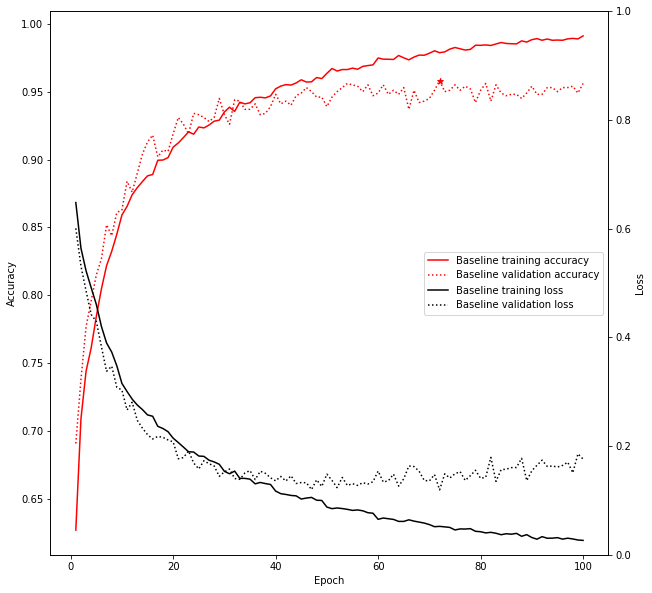

In [73]:
plot_loss_training_curve(acc_traces[2:3], valid_acc_traces[2:3], [losses], [valid_losses], names[2:3])

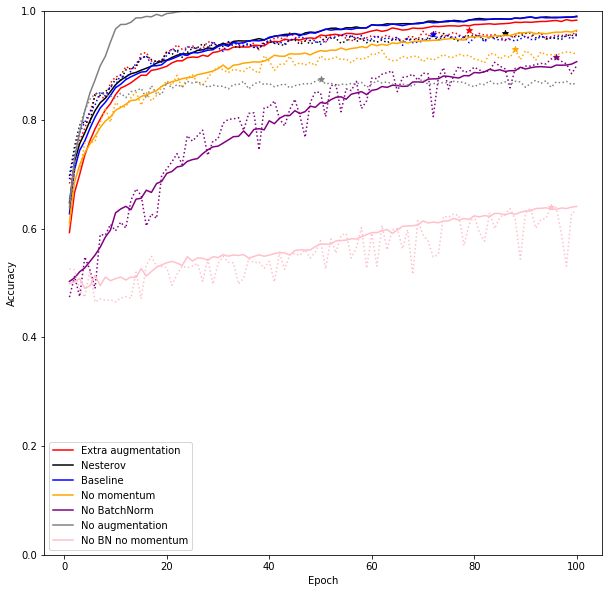

In [72]:
plot_training_curve(acc_traces, valid_acc_traces, names)

In [40]:
for name, t in zip(names, valid_acc_traces):
    print(name, np.max(t))

ExtraAugmentation 0.965
BatchnormMomentum 0.96
Nesterov 0.96
NoMomentum 0.93
NoBatchnorm 0.915
NoBNNoMomentum 0.64


In [100]:
for i, v in enumerate(valid_acc_traces[0]):
    print(i+1, v, acc_traces[0][i])

1 0.683 0.5928080673758865
2 0.714 0.6665004432624113
3 0.762 0.6997451241134752
4 0.785 0.7353169326241135
5 0.814 0.7615802304964538
6 0.845 0.7836879432624113
7 0.842 0.8013630319148937
8 0.84 0.8182624113475178
9 0.868 0.8298426418439716
10 0.879 0.8464095744680851
11 0.882 0.8585438829787234
12 0.898 0.8629210992907801
13 0.894 0.8682956560283688
14 0.895 0.8754432624113475
15 0.922 0.8822584219858156
16 0.924 0.881925975177305
17 0.908 0.8912898936170213
18 0.908 0.8927304964539007
19 0.909 0.8955562943262412
20 0.926 0.8986591312056738
21 0.928 0.9049202127659575
22 0.938 0.9086879432624113
23 0.93 0.9086325354609929
24 0.933 0.9144503546099291
25 0.936 0.9156693262411347
26 0.932 0.9150598404255319
27 0.931 0.9189937943262412
28 0.944 0.9169437056737588
29 0.941 0.9240359042553191
30 0.936 0.925531914893617
31 0.939 0.9295766843971631
32 0.942 0.9291334219858156
33 0.943 0.9338984929078015
34 0.939 0.9341201241134752
35 0.943 0.9341201241134752
36 0.946 0.9340647163120568
37 0.

In [19]:
with open("BatchnormMomentum_preds.pkl", "rb") as f:
    preds = pkl.load(f)

In [20]:
preds = np.array(preds)

In [21]:
ambiguous = (preds - 0.5)**2

In [22]:
most_ambiguous = np.argsort(ambiguous)

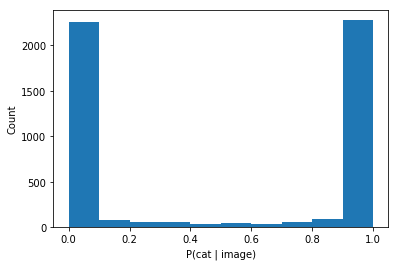

In [23]:
plt.figure()
plt.hist(preds)
plt.xlabel("P(cat | image)")
plt.ylabel("Count")
plt.savefig("Confidence.png")
plt.show()

2353 0.49873996
3803 0.50235635
1215 0.4972651
151 0.5034197
4386 0.4959019
68 0.49546963
1637 0.49517885
3569 0.5058896
4106 0.5062126
374 0.4844718
2345 0.48444286
507 0.51680446
3998 0.5177583
2749 0.4752478
95 0.4731068
3933 0.5295161


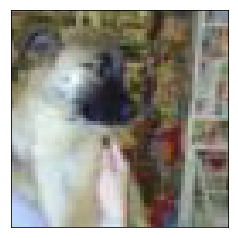

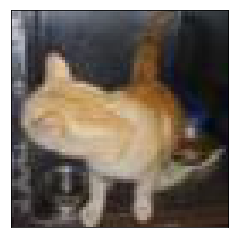

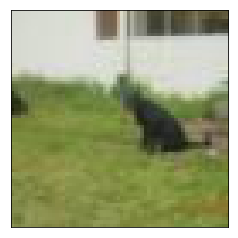

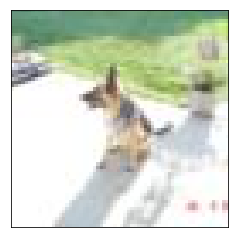

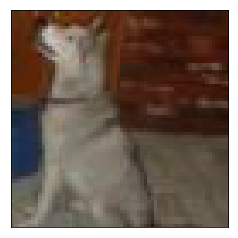

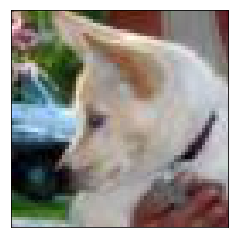

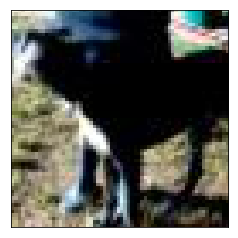

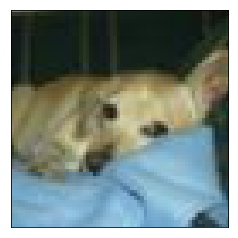

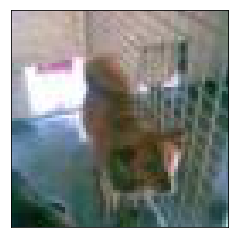

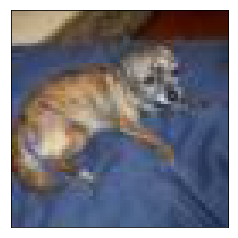

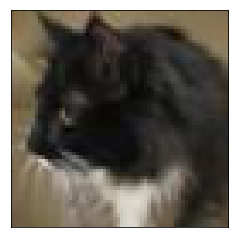

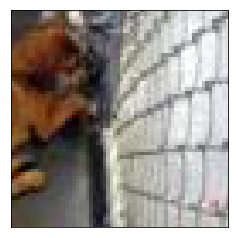

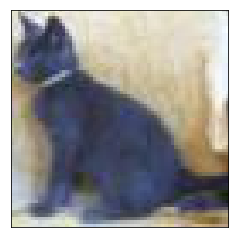

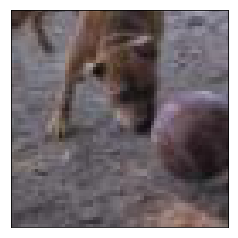

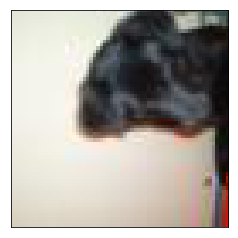

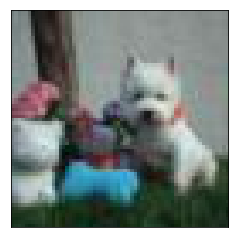

In [53]:
for index in most_ambiguous[:16]:
    image = "./testset/test/{}.jpg".format(index+1)
    image = mpimg.imread(image)
    print(index+1, preds[index])
    plt.figure()
    implot = plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("{}.png".format(index+1))

In [136]:
preds[333]

0.034448802

In [139]:
preds[448]

0.0033159524

0.2957619


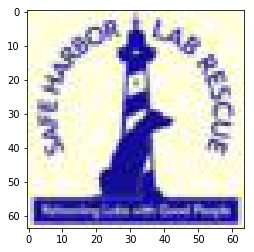

In [148]:
print(preds[826])
image = "./testset/test/{}.jpg".format(826+1)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

0.599772


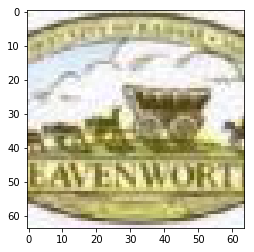

In [52]:
print(preds[836])
image = "./testset/test/{}.jpg".format(836+1)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)
plt.savefig("837.png")

0.9988863


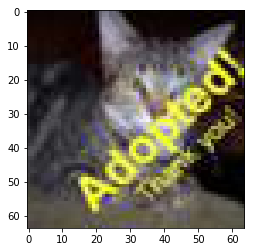

In [152]:
print(preds[1440])
image = "./testset/test/{}.jpg".format(1440+1)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

0.993704


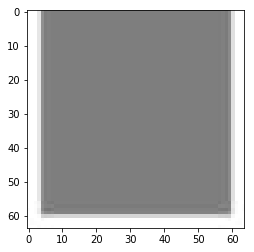

In [153]:
print(preds[2023])
image = "./testset/test/{}.jpg".format(2023+1)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

0.5520805


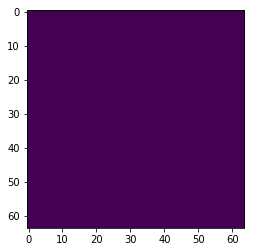

In [154]:
i = 4041
print(preds[i-1])
image = "./testset/test/{}.jpg".format(i)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

0.84649557


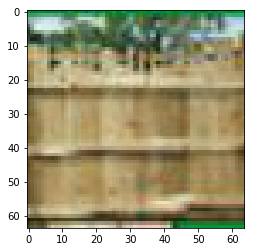

In [155]:
i = 4571
print(preds[i-1])
image = "./testset/test/{}.jpg".format(i)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

0.99986625


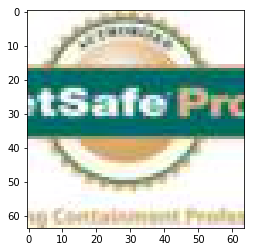

In [54]:
i = 4904
print(preds[i-1])
image = "./testset/test/{}.jpg".format(i)
image = mpimg.imread(image) 
plt.figure()
implot = plt.imshow(image)

651 dog 0.00012442986


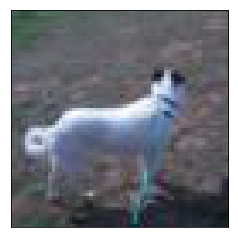

652 cat 1.0


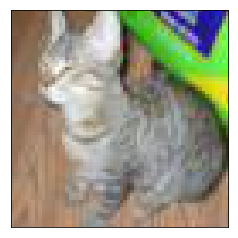

653 dog 4.759857e-07


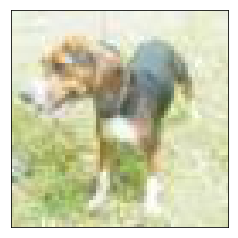

654 dog 0.0007760963


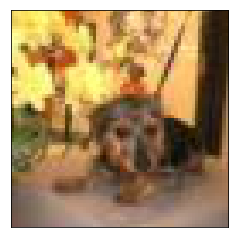

655 dog 0.00040026542


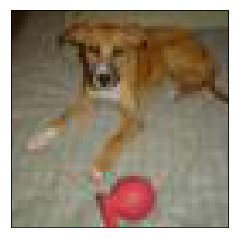

656 dog 0.1593002


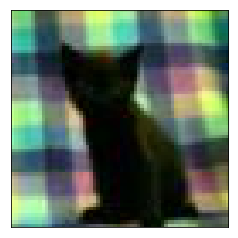

657 dog 1.1772244e-07


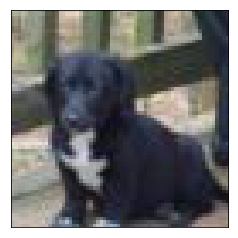

659 dog 0.00026468036


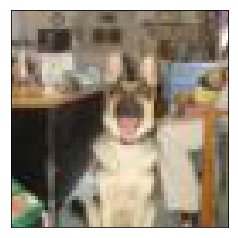

660 dog 3.780357e-05


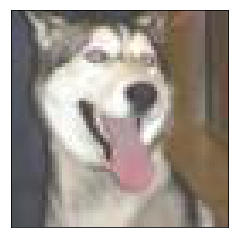

661 dog 4.6599428e-07


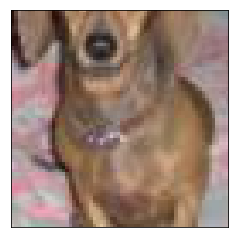

662 dog 0.0028860825


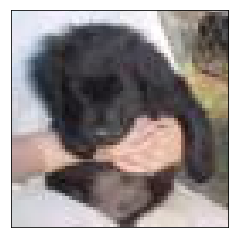

663 cat 0.9998821


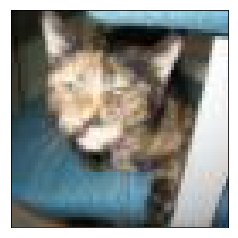

664 cat 1.0


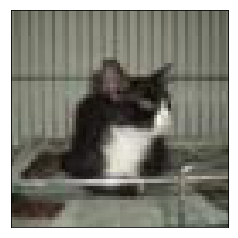

665 cat 0.9999912


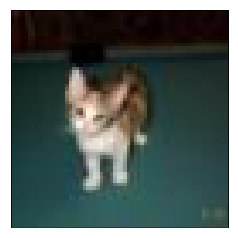

667 dog 1.0060913e-06


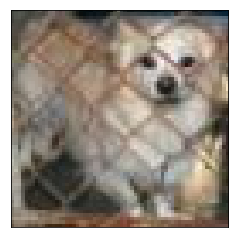

668 dog 0.0001327877


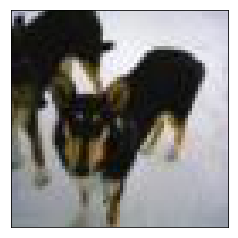

669 dog 8.7585744e-10


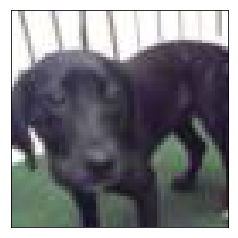

671 cat 0.9983121


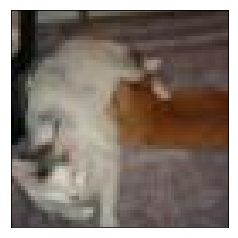

672 dog 1.3950194e-05


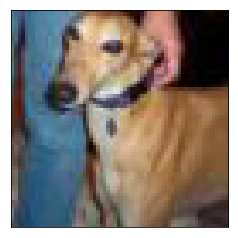

673 cat 0.99999964


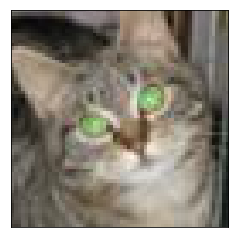

674 dog 1.0505203e-06


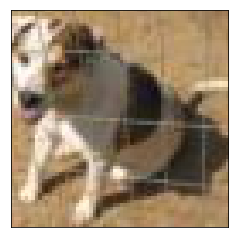

675 dog 6.5432556e-05


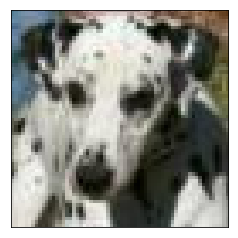

676 cat 0.99978274


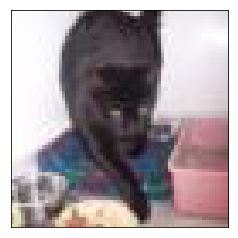

678 dog 0.018063402


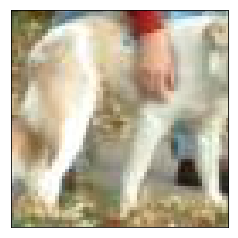

679 cat 0.99999976


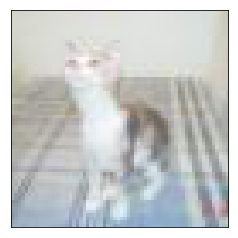

680 cat 0.9999858


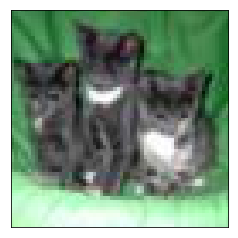

681 dog 1.1844269e-05


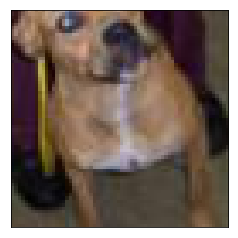

684 dog 2.4960116e-06


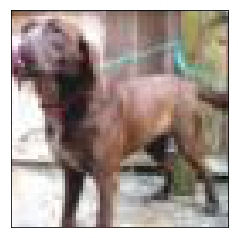

685 cat 0.998879


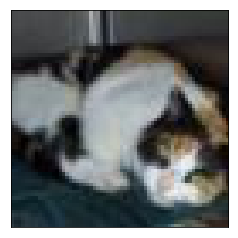

686 cat 0.99986994


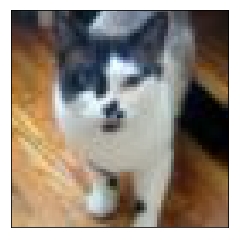

687 cat 0.999721


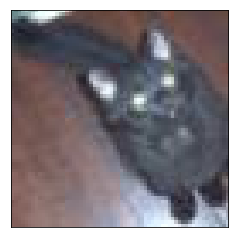

688 dog 9.500256e-06


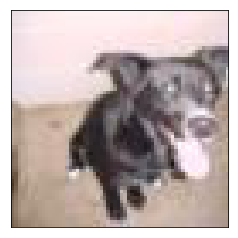

689 dog 2.2270497e-06


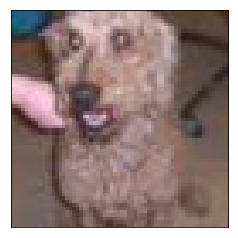

690 dog 0.0005527236


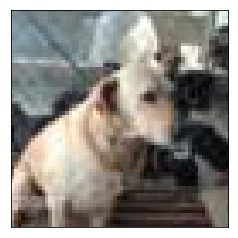

691 cat 1.0


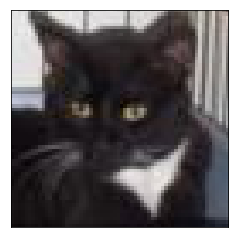

693 cat 1.0


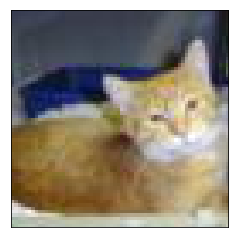

694 cat 0.9400509


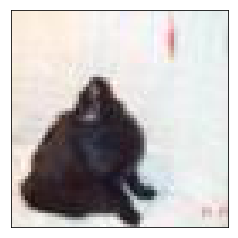

695 cat 0.99999857


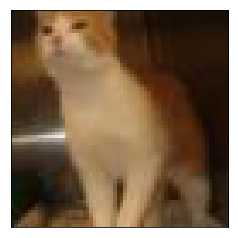

696 dog 2.0720793e-06


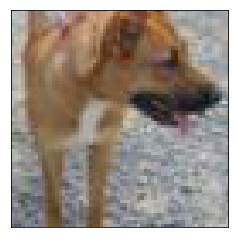

697 dog 3.0480362e-05


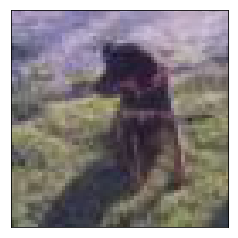

698 cat 0.9999434


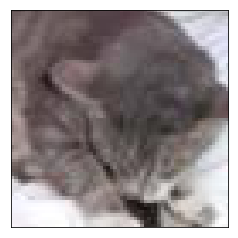

699 dog 4.806784e-05


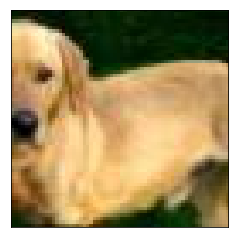

700 cat 0.98829484


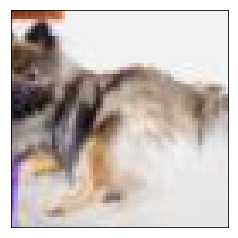

In [94]:
start = 650
r = np.arange(start, start+50)
for index in r:
    pred = preds[index]
    if (.5 - pred)**2 > 0.1:
        image = "./testset/test/{}.jpg".format(index+1)
        image = mpimg.imread(image)
        classn = "cat" if pred > 0.5 else "dog"
        print(index+1, classn, pred)
        plt.figure()
        implot = plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

In [95]:
i1 = 58
i2 = 167
i3 = 194
i4 = 213
i5 = 252
i6 = 306
i7 = 656
i8 = 334
i9 = 466
i10 = 546
i11 = 556
i12 = 557
i13 = 603
i14 = 627
i15 = 640
i16 = 650

In [96]:
misclassifications = [i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12, i13, i14, i15, i16]


58 0.91277754
167 0.11038832
194 0.031066518
213 0.89417994
252 0.98728347
306 0.97425586
656 0.1593002
334 0.034448802
466 0.9990552
546 0.95202434
556 0.06088604
557 0.0418876
603 0.09687746
627 0.07908955
640 0.9556179
650 0.88827837


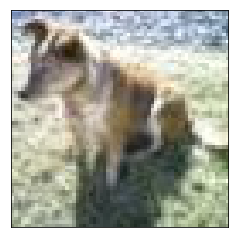

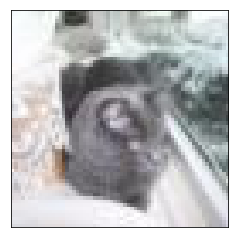

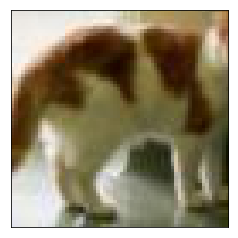

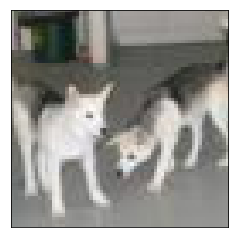

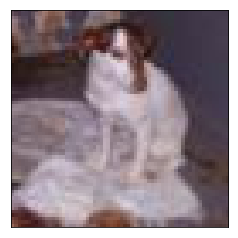

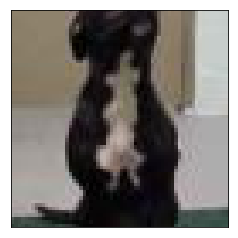

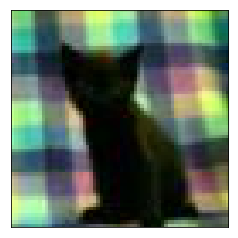

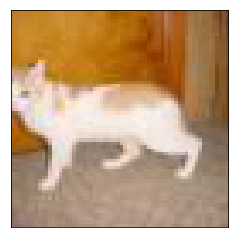

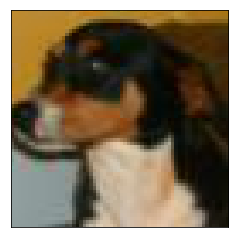

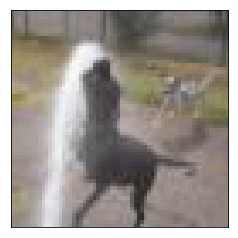

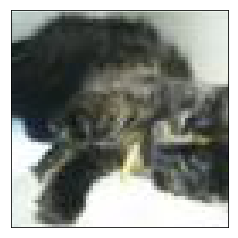

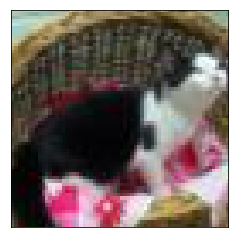

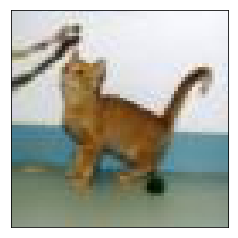

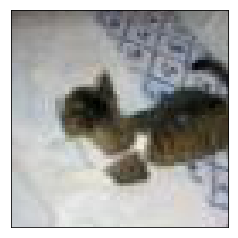

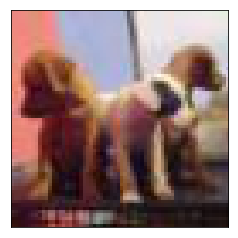

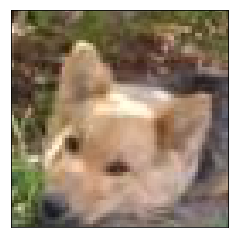

In [97]:
for index in misclassifications:
    image = "./testset/test/{}.jpg".format(index)
    image = mpimg.imread(image)
    print(index, preds[index-1])
    plt.figure()
    implot = plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("{}.png".format(index))